# Re-use braking energy
* Are there times when there is a greater opportunity to re-use the braking energy?

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data
file_path = 'data/clean_clean_energy.csv'
df = pd.read_csv(file_path)

### Data Preparation & Correlation Matrix

In [3]:
# Convert date columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Extracting features from start date
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['hour'] = df['start_date'].dt.hour
df['month'] = df['start_date'].dt.month
df['season'] = df['month'].apply(get_season)

# Aggregating hourly
df['period'] = df['hour']

aggregated_data = df.groupby(['season', 'period']).agg({
    'auxiliary_energy_consumed': 'sum',
    'regenerated_energy_to_auxiliaries': 'sum',
    'rheostatic_energy': 'sum'
}).reset_index()

aggregated_data['regenerated_energy_to_auxiliaries'] = aggregated_data['regenerated_energy_to_auxiliaries'].abs()
aggregated_data['rheostatic_energy'] = aggregated_data['rheostatic_energy'].abs()


# Compute correlation
correlation = aggregated_data[['auxiliary_energy_consumed', 'regenerated_energy_to_auxiliaries','rheostatic_energy']].corr()
print("Correlation between Auxiliary Energy Consumed and Regenerated Energy to Auxiliaries:")
correlation


Correlation between Auxiliary Energy Consumed and Regenerated Energy to Auxiliaries:


,auxiliary_energy_consumed,regenerated_energy_to_auxiliaries,rheostatic_energy
auxiliary_energy_consumed,1.000000,0.999603,0.965894
regenerated_energy_to_auxiliaries,0.999603,1.000000,0.969259
rheostatic_energy,0.965894,0.969259,1.000000


We notice a strong correaltion between auxiliary_energy_consumed and regenerated_energy_to_auxiliaries, we decide to have a look at that

### Plotting for every season auxiliary energy consumption and the regenerated auxiliary to check for any variation within season

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28678/1352396187.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_demand_periods = season_data[aggregated_data['auxiliary_energy_consumed'] > high_demand_threshold]


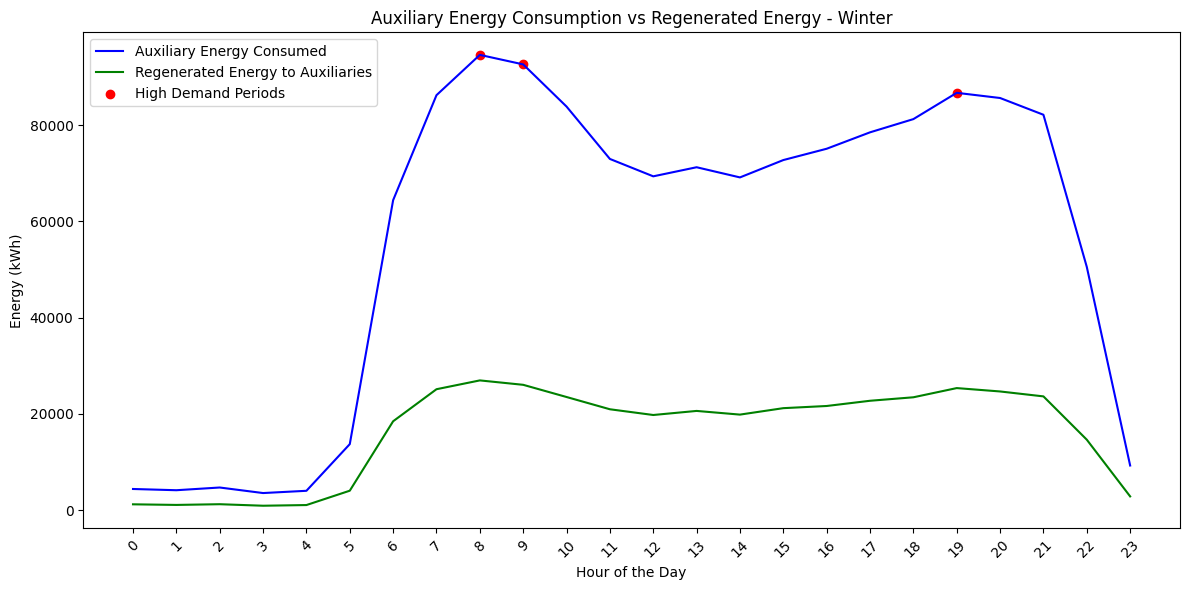

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28678/1352396187.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_demand_periods = season_data[aggregated_data['auxiliary_energy_consumed'] > high_demand_threshold]


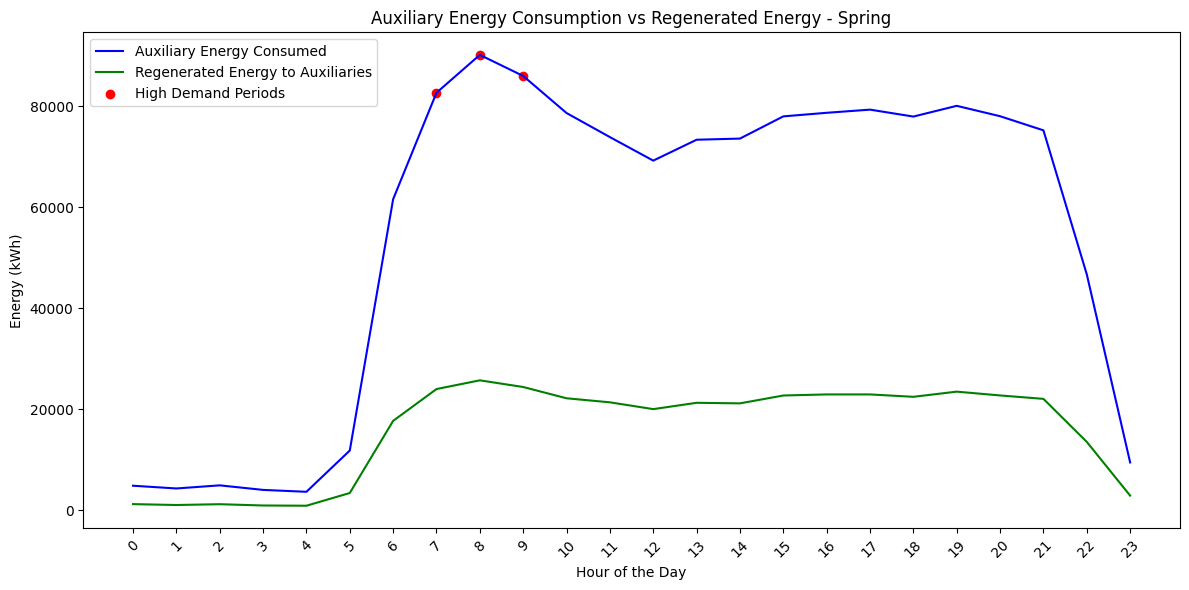

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28678/1352396187.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_demand_periods = season_data[aggregated_data['auxiliary_energy_consumed'] > high_demand_threshold]


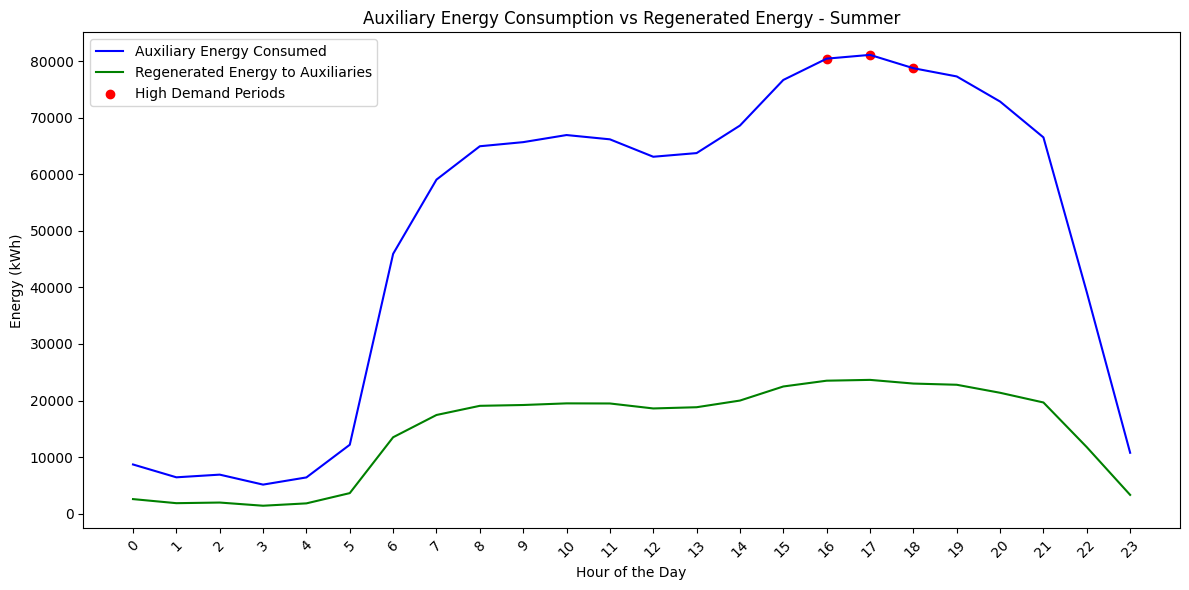

/var/folders/wm/c9ks71w95s35n6j8r61gvcg40000gn/T/ipykernel_28678/1352396187.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_demand_periods = season_data[aggregated_data['auxiliary_energy_consumed'] > high_demand_threshold]


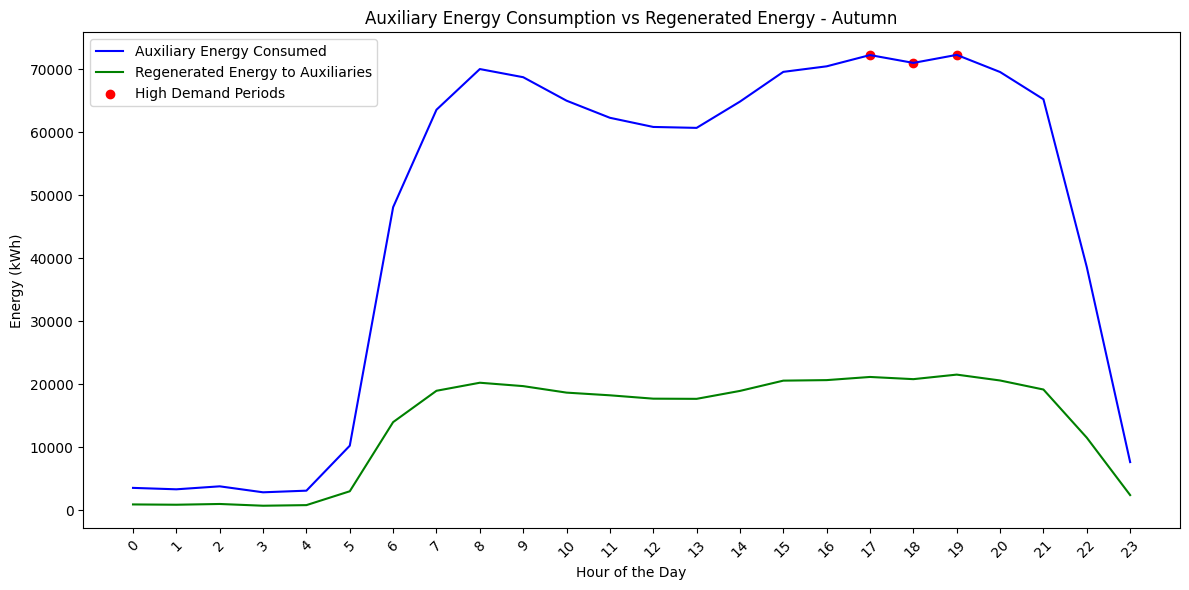

In [4]:
def plot_season_data(season, data):
    season_data = aggregated_data[aggregated_data['season'] == season]

    # Highlight periods with high auxiliary energy demand
    high_demand_threshold = season_data['auxiliary_energy_consumed'].quantile(0.90)
    high_demand_periods = season_data[aggregated_data['auxiliary_energy_consumed'] > high_demand_threshold]

    plt.figure(figsize=(12, 6))
    plt.plot(season_data['period'].astype(str), season_data['auxiliary_energy_consumed'], label='Auxiliary Energy Consumed', color='blue')
    plt.plot(season_data['period'].astype(str), season_data['regenerated_energy_to_auxiliaries'], label='Regenerated Energy to Auxiliaries', color='green')
    plt.scatter(high_demand_periods['period'].astype(str), high_demand_periods['auxiliary_energy_consumed'], color='red', label='High Demand Periods')

    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy (kWh)')
    plt.title(f'Auxiliary Energy Consumption vs Regenerated Energy - {season}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot data for each season
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    plot_season_data(season, aggregated_data)

### Plotting for every season auxiliary energy consumption and the regenerated auxiliary all in one graph

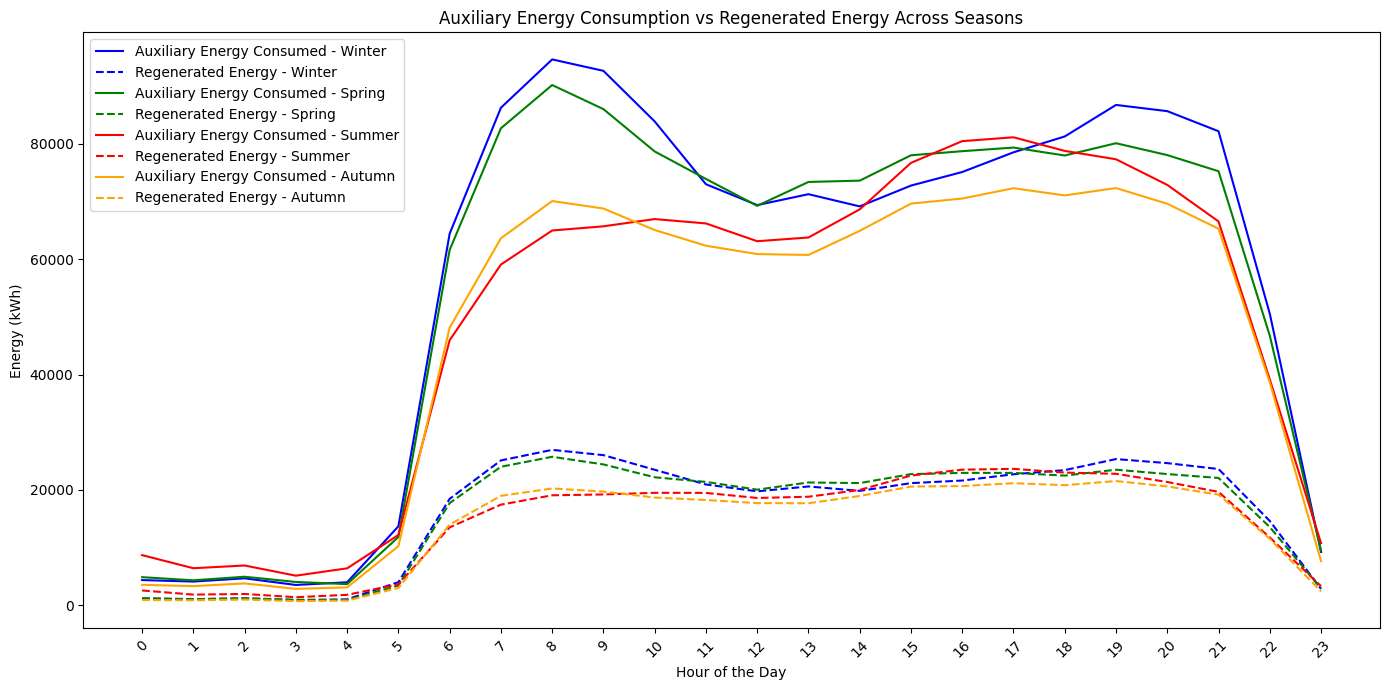

In [5]:
plt.figure(figsize=(14, 7))

colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Autumn': 'orange'}
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    season_data = aggregated_data[aggregated_data['season'] == season]
    plt.plot(season_data['period'], season_data['auxiliary_energy_consumed'], label=f'Auxiliary Energy Consumed - {season}', color=colors[season])
    plt.plot(season_data['period'], season_data['regenerated_energy_to_auxiliaries'], linestyle='--', label=f'Regenerated Energy - {season}', color=colors[season])

plt.xlabel('Hour of the Day')
plt.ylabel('Energy (kWh)')
plt.title('Auxiliary Energy Consumption vs Regenerated Energy Across Seasons')
plt.legend()
plt.xticks(range(0, 24), rotation=45)
plt.tight_layout()
plt.show()

### Plotting for every season auxiliary energy consumption and the regenerated auxiliary all in one graph with the rheostatic energy

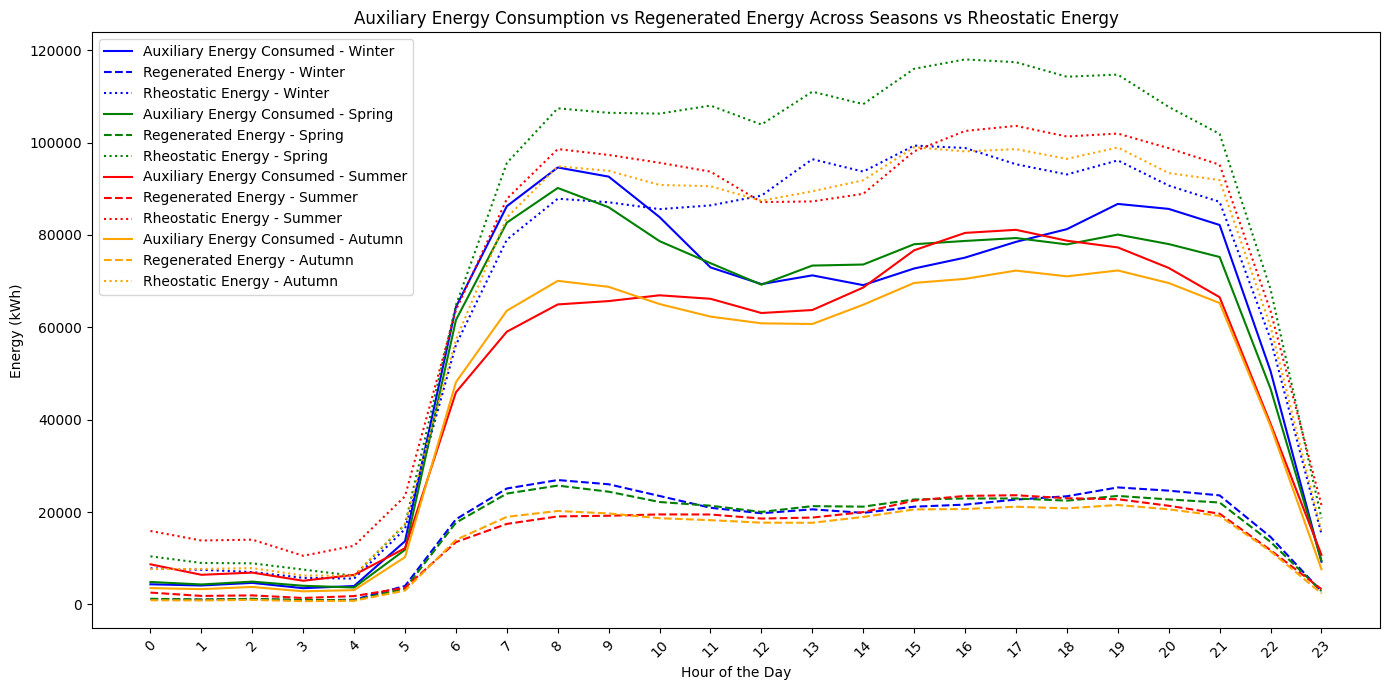

In [6]:
plt.figure(figsize=(14, 7))

colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Autumn': 'orange'}
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    season_data = aggregated_data[aggregated_data['season'] == season]
    plt.plot(season_data['period'], season_data['auxiliary_energy_consumed'], label=f'Auxiliary Energy Consumed - {season}', color=colors[season])
    plt.plot(season_data['period'], season_data['regenerated_energy_to_auxiliaries'], linestyle='--', label=f'Regenerated Energy - {season}', color=colors[season])
    plt.plot(season_data['period'], season_data['rheostatic_energy'], linestyle=':', label=f'Rheostatic Energy - {season}', color=colors[season])

plt.xlabel('Hour of the Day')
plt.ylabel('Energy (kWh)')
plt.title('Auxiliary Energy Consumption vs Regenerated Energy Across Seasons vs Rheostatic Energy')
plt.legend()
plt.xticks(range(0, 24), rotation=45)
plt.tight_layout()
plt.show()

We notice that for rheostatic energy spring(green dotted line) that seems to be isolated from the other rheostatic energy in different season.

## This section is concerned having a look at the data with tables instead of graph, just to validate our assumptions

In [7]:
# Loading the data
df_2 = pd.read_csv(file_path)

In [8]:
# First and last dates
earliest_start_date = df_2['start_date'].min()
latest_start_date = df_2['start_date'].max()

earliest_start_date, latest_start_date

('2022-04-01T00:00:00.000Z', '2024-04-30T23:56:52.000Z')

### Organizing the data by month to compare and contrast

In [9]:
# Converting to datetime
df_2['start_date'] = pd.to_datetime(df_2['start_date'])

# Extracting features from start date
df_2['year'] = df_2['start_date'].dt.year
df_2['month'] = df_2['start_date'].dt.month

# Aggregating by month and year
summary = df_2.groupby(['year', 'month']).agg({
    'auxiliary_energy_consumed': 'sum',
    'regenerated_energy_to_auxiliaries': 'sum'
}).reset_index()

# Percentage regenerated
summary['percentage_regenerated'] = (summary['regenerated_energy_to_auxiliaries'] / summary['auxiliary_energy_consumed'] * 100)
summary = summary.sort_values(by=['year', 'month'])

summary

,year,month,auxiliary_energy_consumed,regenerated_energy_to_auxiliaries,percentage_regenerated
0,2022,4,203200.502710,-56987.291512,-28.044858
1,2022,5,170025.082963,-46939.394932,-27.607335
2,2022,6,182862.653083,-51552.698215,-28.192032
3,2022,7,196491.879969,-56595.209308,-28.802823
4,2022,8,218200.320857,-64886.072223,-29.736928
5,2022,9,183150.170902,-54582.974610,-29.802306
6,2022,10,174325.939837,-51426.767672,-29.500353
7,2022,11,192703.001417,-56671.241342,-29.408593
8,2022,12,204237.914875,-60320.159252,-29.534261
9,2023,1,242764.306532,-70825.477309,-29.174584


### Grouping months by season to compare between different years when applicable

In [10]:
# Define what months for each season
def get_season(year, month):
    if year == 2022:
        if month in [3, 4, 5]:
            return 'Spring 2022'
        elif month in [6, 7, 8]:
            return 'Summer 2022'
        elif month in [9, 10, 11]:
            return 'Fall 2022'
        elif month == 12:
            return 'Winter 2023'
    elif year == 2023:
        if month in [1, 2]:
            return 'Winter 2023'
        elif month in [3, 4, 5]:
            return 'Spring 2023'
        elif month in [6, 7, 8]:
            return 'Summer 2023'
        elif month in [9, 10, 11]:
            return 'Fall 2023'
        elif month == 12:
            return 'Winter 2024'
    elif year == 2024:
        if month in [1, 2]:
            return 'Winter 2024'
        elif month in [3, 4]:
            return 'Spring 2024'
    return None

# Getting year and season
df_2['season'] = df_2.apply(lambda x: get_season(x['year'], x['month']), axis=1)

# Filter out rows where season is not present
df_2 = df_2[df_2['season'].notna()]

# Summarize the data by year and season
summary = df_2.groupby(['season']).agg({
    'auxiliary_energy_consumed': 'sum',
    'regenerated_energy_to_auxiliaries': 'sum'
}).reset_index()

# Calculate the percentage of regenerated energy
summary['percentage_regenerated'] = (
    summary['regenerated_energy_to_auxiliaries'] / summary['auxiliary_energy_consumed'] * 100
)

# Define a custom season order for sorting
season_order = [
    'Spring 2022', 'Summer 2022', 'Fall 2022',
    'Winter 2023', 'Spring 2023', 'Summer 2023', 'Fall 2023',
    'Winter 2024', 'Spring 2024'
]

summary['season'] = pd.Categorical(summary['season'], categories=season_order, ordered=True)
summary = summary.sort_values(by=['season'])

summary

,season,auxiliary_energy_consumed,regenerated_energy_to_auxiliaries,percentage_regenerated
2,Spring 2022,373225.585673,-103926.686444,-27.845542
5,Summer 2022,597554.853909,-173033.979746,-28.957003
0,Fall 2022,550179.112156,-162680.983625,-29.568731
7,Winter 2023,690288.766846,-201171.283833,-29.143062
3,Spring 2023,553940.561939,-164237.307483,-29.648904
6,Summer 2023,596029.180091,-177354.342108,-29.755983
1,Fall 2023,577970.890895,-167269.813184,-28.940872
8,Winter 2024,670478.882171,-189315.071240,-28.235799
4,Spring 2024,399270.071317,-114487.173778,-28.674119


### Grouping months by season to compare between different years when applicable using traction_energy and regenerated_traction_energy

In [11]:
# Summarize the data by year and season
summary = df_2.groupby(['season']).agg({
    'traction_energy': 'sum',
    'regenerated_traction_energy': 'sum'
}).reset_index()

# Percentage regenerated
summary['percentage_regenerated'] = (summary['regenerated_traction_energy'] / summary['traction_energy'] * 100)

season_order = [
    'Spring 2022', 'Summer 2022', 'Fall 2022',
    'Winter 2023', 'Spring 2023', 'Summer 2023', 'Fall 2023',
    'Winter 2024', 'Spring 2024'
]

summary['season'] = pd.Categorical(summary['season'], categories=season_order, ordered=True)
summary = summary.sort_values(by=['season'])

summary

,season,traction_energy,regenerated_traction_energy,percentage_regenerated
2,Spring 2022,2.756559e+06,7.692376e+05,27.905719
5,Summer 2022,4.397243e+06,1.282447e+06,29.164801
0,Fall 2022,4.110425e+06,1.225114e+06,29.805042
7,Winter 2023,4.232915e+06,1.314219e+06,31.047611
3,Spring 2023,4.119907e+06,1.258638e+06,30.550154
6,Summer 2023,4.451841e+06,1.344583e+06,30.202852
1,Fall 2023,4.234076e+06,1.213102e+06,28.650935
8,Winter 2024,4.359804e+06,1.268420e+06,29.093502
4,Spring 2024,2.900774e+06,8.423614e+05,29.039194


Summary: There isn't much variation going on between different months or even seasons in terms of percentage. Despite not having the entire seasons for the three different years(since our data starts in April 2022 and ends in April 2024), the optimal strategy is to estimate, compare and contrast the percentage regenerated for either traction_energy or auxiliary_consumed.

We noticed at the beginning of this notebook that rheostatic_energy for spring clearly deviates from the "trend" formed from the other seasons. This can be a valid point to bring up.